In [1]:
import numpy as np
import matplotlib.pyplot as plt
from train import *

In [7]:
x1 = np.load('data/celeba_split/celeba_20000.npy')
x2 = np.load('data/celeba_split/celeba_40000.npy')
x3 = np.load('data/celeba_split/celeba_60000.npy')
x4 = np.load('data/celeba_split/celeba_80000.npy')

In [8]:
x_data = np.concatenate((x1, x2, x3, x4))
x_data.shape

(80000, 64, 64, 3)

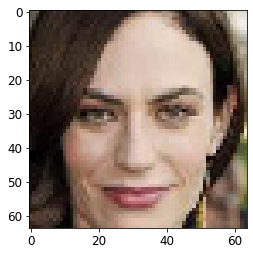

In [4]:
plt.imshow(x_data[23])

In [5]:
x_train, x_valid = train_test_split(x_data, test_size=0.1)
x_train.shape, x_valid.shape

((36000, 64, 64, 3), (4000, 64, 64, 3))

In [6]:
model = TrainVAE(x_train, x_valid, 'results/celeba3', 100)
model.encoder.summary()
model.decoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 32, 32, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 16, 16, 32)   9248        leaky_re_lu[0][0]                
____________________________________________________________________________________________

In [7]:
model.vae.summary()

Model: "vae"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
encoder (Model)              [(None, 100), (None, 100) 277160    
_________________________________________________________________
decoder (Model)              (None, 64, 64, 3)         251843    
Total params: 529,003
Trainable params: 529,003
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.train(4, batch_size=16)